# Lab 4: Data Visualization and EDA

#### CPE232 Data Models

---

1. Load all Superstore datasets.

*Note: The same datasets used in Lab 3*

In [1]:
# Write your code here
import pandas as pd

order_df = pd.read_csv('superstore_order.csv')
people_df = pd.read_csv('superstore_people.csv')
returns_df = pd.read_csv('superstore_return.csv')

2. Determine shape of each dataset (print out the results as well).

In [2]:
# Write your code here
print(order_df.shape)
print(people_df.shape)
print(returns_df.shape)


(8880, 21)
(4, 2)
(296, 2)


3. Show information of the dataset.


In [3]:
# Write your code here
print("order info")
order_df.info()
print("\npeople info")
people_df.info()
print("\nreturns info")
returns_df.info()


order info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8880 non-null   int64  
 1   Order ID       8880 non-null   object 
 2   Order Date     8880 non-null   object 
 3   Ship Date      8880 non-null   object 
 4   Ship Mode      8880 non-null   object 
 5   Customer ID    8880 non-null   object 
 6   Customer Name  8880 non-null   object 
 7   Segment        8880 non-null   object 
 8   Country        8880 non-null   object 
 9   City           8880 non-null   object 
 10  State          8880 non-null   object 
 11  Postal Code    8880 non-null   int64  
 12  Region         8880 non-null   object 
 13  Product ID     8880 non-null   object 
 14  Category       8880 non-null   object 
 15  Sub-Category   8880 non-null   object 
 16  Product Name   8880 non-null   object 
 17  Sales          8880 non-null   float64
 1

In [4]:
print("Missing values in order_df:")
print(order_df.isnull().sum())

print("\nMissing values in people_df:")
print(people_df.isnull().sum())

print("\nMissing values in returns_df:")
print(returns_df.isnull().sum())

Missing values in order_df:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Missing values in people_df:
Person    0
Region    0
dtype: int64

Missing values in returns_df:
Returned    0
Order ID    0
dtype: int64


4. Are there any missing values? If so, in which column?

Ans: None

5.
- 5.1 List unique segments
- 5.2 List unique segments and their corresponding count
- 5.3 Create a pie chart to demonstrate unique segments and their count
- 5.4 Briefly describe what could be interpreted from this pie chart

*Note: please create additional cells to answer 5.2 - 5.3*

In [5]:
# Write your code here (5.1)

# List unique segment values
print(order_df["Segment"].unique())

['Consumer' 'Corporate' 'Home Office']


In [6]:
# Write your code here (5.2)

# List unique segments and their corresponding count
print(order_df["Segment"].value_counts())

Segment
Consumer       4613
Corporate      2673
Home Office    1594
Name: count, dtype: int64


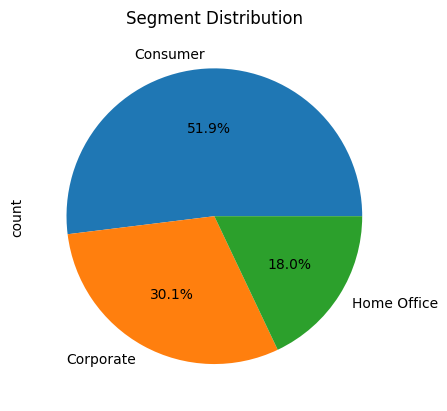

In [7]:
# Write your code here (5.3)

# Create a pie chart to demonstrate unique segments and their count
import matplotlib.pyplot as plt

order_df["Segment"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Segment Distribution")
plt.show()


The pie chart shows the distribution of different segments in the dataset. From the chart, we can interpret the proportion of each segment (Consumer, Corporate, and Home Office) in the dataset. The chart helps us understand which segment has the highest and lowest representation. For example, if the Consumer segment occupies the largest portion of the pie, it indicates that most of the orders come from consumers. Conversely, if the Home Office segment is the smallest, it indicates that fewer orders come from home offices.

Answer for the question 5.4

Ans: shows the distribution of different segments in the dataset, we can interpret the proportion of each segment 

6.
- 6.1 List unique states
- 6.2 List top-10 unique states and their corresponding count
- 6.3 Create a bar chart (vertical) to demonstrate the count of top-10 unique states
- 6.4 Based on 6.2, also include the total sales of these states (show your result as a dataframe)
- 6.5 Using the result from 6.4, if you were the owner of this superstore, what information could be interpreted from this result?

*Note: please create additional cells to answer 6.2 - 6.4*

In [8]:
# Write your code here (6.1)

# List unique states
print(order_df["State"].unique())

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


In [9]:
# Write your code here (6.2)

# List top-10 unique states and their corresponding count
print(order_df["State"].value_counts().head(10))

State
California        1754
New York          1001
Texas              860
Pennsylvania       531
Washington         452
Illinois           427
Ohio               396
Florida            339
Michigan           230
North Carolina     229
Name: count, dtype: int64


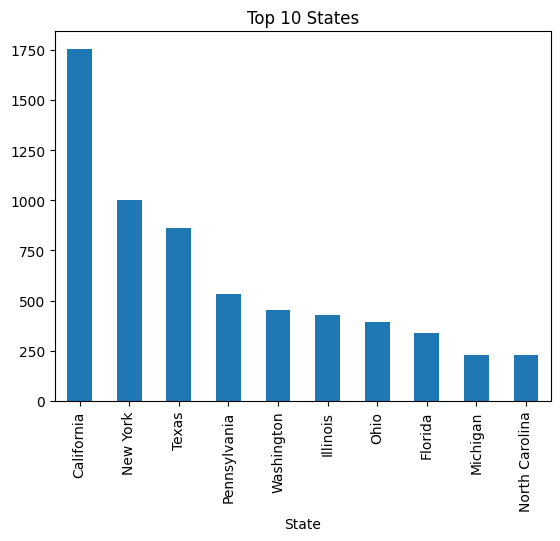

In [10]:
# Write your code here (6.3)

# Create a bar chart (vertical) to demonstrate the count of top-10 unique states
order_df["State"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 States")
plt.show()

In [11]:
# Write your code here (6.4)

# include the total sales of these states (show your result as a dataframe)
top_10_states = order_df["State"].value_counts().head(10).index
top_10_states_df = order_df[order_df["State"].isin(top_10_states)]
result = top_10_states_df.groupby("State")["Sales"].sum().reset_index()
print(result.sort_values("Sales", ascending=False))

            State        Sales
0      California  399195.4555
4        New York  274866.8190
8           Texas  147855.0282
9      Washington  124497.7780
7    Pennsylvania  103852.5210
1         Florida   84083.0880
2        Illinois   71456.1780
6            Ohio   67924.2140
3        Michigan   62147.6960
5  North Carolina   49962.1580


Answer for the question 6.5 

Using the result from 6.4, if you were the owner of this superstore, what information could be interpreted from this result?

Ans: California has a noticeably high number of sales, followed by New York. Other states have much lower numbers.

7.
- 7.1 List unique categories
- 7.2 Create a bar chart (horizontal) to demonstrate the proportion of these categories
- 7.3 Compute the ratio of these categories in percentage and print the results

*Note: please create additional cells to answer 7.2 - 7.3*

In [12]:
# Write your code here (7.1)

# List unique categories
print(order_df["Category"].unique())

['Furniture' 'Office Supplies' 'Technology']


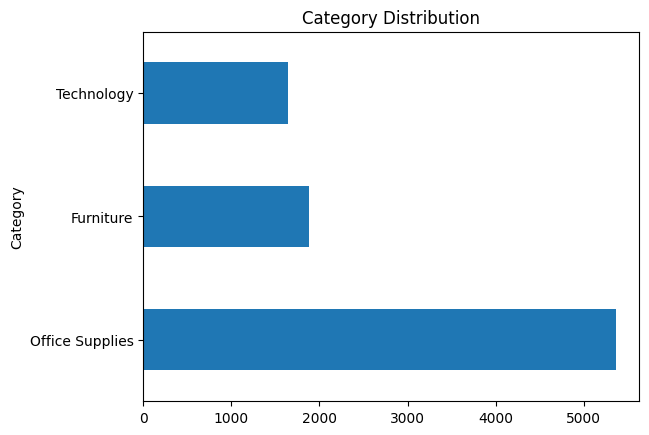

In [13]:
# Write your code here (7.2)

# Create a bar chart (horizontal) to demonstrate the proportion of these categories
order_df["Category"].value_counts().plot(kind="barh")
plt.title("Category Distribution")
plt.show()

In [14]:
# Write your code here (7.3)

# Compute the ratio of these categories in percentage and print the results
category_percentage = order_df["Category"].value_counts()/order_df["Category"].value_counts().sum()*100
print(category_percentage)

Category
Office Supplies    60.360360
Furniture          21.171171
Technology         18.468468
Name: count, dtype: float64


8. Update the type of all columns that contain dates to *datetime* and show information after an update.

In [15]:
# write your code here

# Update the type of all columns that contain dates to *datetime* and show information after an update.
order_df["Order Date"] = pd.to_datetime(order_df["Order Date"], format="%d/%m/%Y")
order_df["Ship Date"] = pd.to_datetime(order_df["Ship Date"], format="%d/%m/%Y")
print(order_df["Order Date"].dtypes)
print(order_df["Ship Date"].dtypes)
order_df.info()



datetime64[ns]
datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         8880 non-null   int64         
 1   Order ID       8880 non-null   object        
 2   Order Date     8880 non-null   datetime64[ns]
 3   Ship Date      8880 non-null   datetime64[ns]
 4   Ship Mode      8880 non-null   object        
 5   Customer ID    8880 non-null   object        
 6   Customer Name  8880 non-null   object        
 7   Segment        8880 non-null   object        
 8   Country        8880 non-null   object        
 9   City           8880 non-null   object        
 10  State          8880 non-null   object        
 11  Postal Code    8880 non-null   int64         
 12  Region         8880 non-null   object        
 13  Product ID     8880 non-null   object        
 14  Category       8880 non-null   object     

9. Create a new column "Processing time day" to show number of days taken to ship an order and show your result in a dataframe format.

*Hint: The duration starts as soon as the item has been ordered and ends once the order has successfully shipped.*

In [16]:
# write your code here

# Create a new column "Processing time day" to show number of days taken to ship an order and show your result in a dataframe format.

order_df["Processing Time Day"] = (order_df["Ship Date"] - order_df["Order Date"]).dt.days

order_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Processing Time Day
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs ...,731.9400,3,0.00,219.5820,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2,0.20,2.5164,7


10. Based on the result in 9.
- 10.1 How many orders are there that take more than 5 days to process?
- 10.2 Show the top 5 rows (expected output should contain these columns: Order ID, Order Date, Ship Date, Processing time day, Quantity)
- 10.3 Plot the histogram based on the column Quantity

*Note: please create additional cells to answer 10.2 - 10.3*

In [17]:
# Write your code here (10.1)

# How many orders are there that take more than 5 days to process?
order_df[order_df["Processing Time Day"] > 5].shape[0]

1656

In [18]:
# Write your code here (10.2)

# Show the top 5 rows (expected output should contain these columns: Order ID, Order Date, Ship Date, Processing time day, Quantity)
order_df[["Order ID", "Order Date", "Ship Date", "Processing Time Day", "Quantity"]].head(5)

,Order ID,Order Date,Ship Date,Processing Time Day,Quantity
0,CA-2016-152156,2016-11-08,2016-11-11,3,2
1,CA-2016-152156,2016-11-08,2016-11-11,3,3
2,CA-2016-138688,2016-06-12,2016-06-16,4,2
3,US-2015-108966,2015-10-11,2015-10-18,7,5
4,US-2015-108966,2015-10-11,2015-10-18,7,2


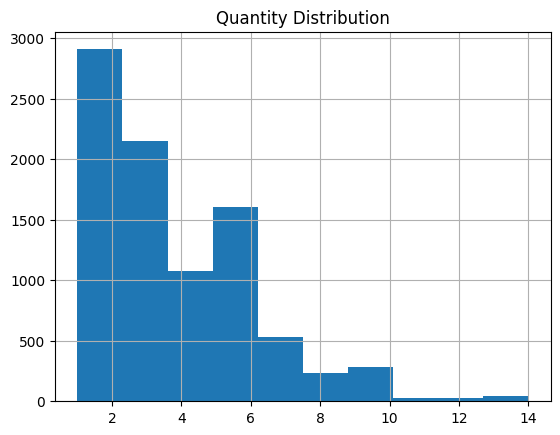

In [19]:
# Write your code here (10.3)

# Plot the histogram based on the column Quantity
order_df["Quantity"].hist()
plt.title("Quantity Distribution")
plt.show()

11. Total sales compare across different regions
  
- 11.1 Create a bar chart to visualize.

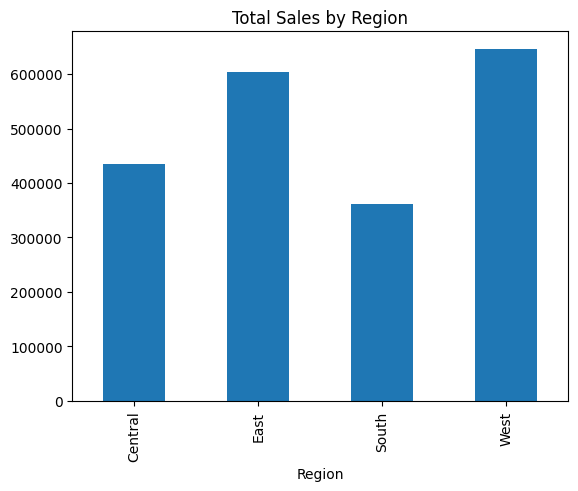

In [20]:
# Write your code here (11.1)

# List unique regions and their sales
order_df.groupby("Region")["Sales"].sum().plot(kind="bar")
plt.title("Total Sales by Region")
plt.show()

- 11.2 How do total sales compare across different regions? Explain in as much detail as possible.
  
  Ans: West has highest sale ,followed by East, Central, and South respectively

12.Which states have the highest number of returns? Use a horizontal bar chart.

Ans: Carifonia

In [21]:
# Join returns_df with order_df using Order ID and show the first five rows
result = pd.merge(order_df, returns_df, on="Order ID", how="inner")
result.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Processing Time Day,Returned
0,19,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.56,2,0.0,2.4824,5,Yes
1,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.48,3,0.2,16.0110,5,Yes
2,21,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,OFF-BI-10002215,Office Supplies,Binders,Wilson Jones Hanging View Binder White 1,22.72,4,0.2,7.3840,5,Yes
3,56,CA-2016-111682,2016-06-17,2016-06-18,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,OFF-ST-10000604,Office Supplies,Storage,Home/Office Personal File Carts,208.56,6,0.0,52.1400,1,Yes
4,57,CA-2016-111682,2016-06-17,2016-06-18,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,OFF-PA-10001569,Office Supplies,Paper,Xerox 232,32.40,5,0.0,15.5520,1,Yes


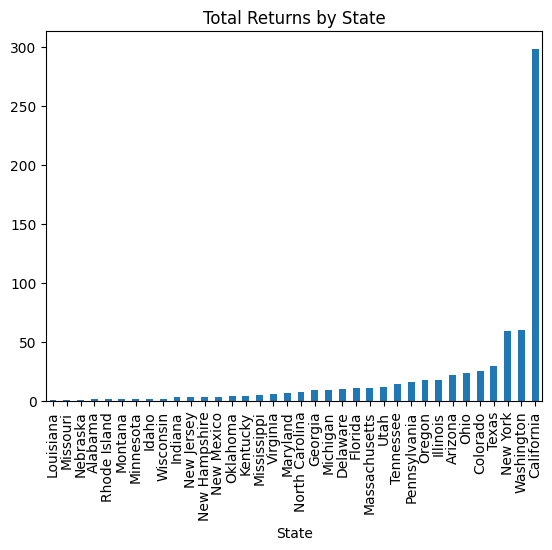

In [22]:
# Write your code here (12)

result.groupby("State")["Returned"].count().sort_values().plot(kind="bar")
plt.title("Total Returns by State")
plt.show()

13. What is the correlation between numerical variables in the superstore_order dataset? Use a heatmap
*Hint: Use seaborn to create a heatmap :)*

<Axes: >

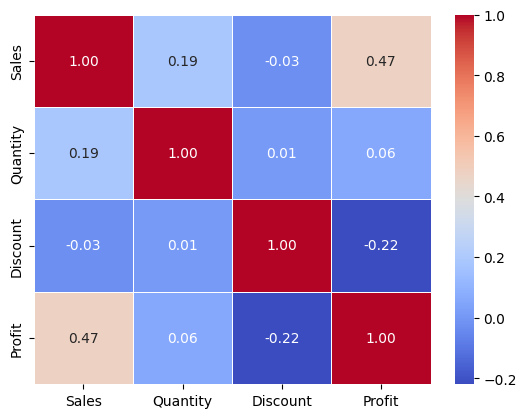

In [23]:
# Write your code here (13)
import seaborn as sns

# Selecting numerical columns
numeric_cols = ["Sales", "Quantity", "Discount", "Profit"]

# Compute correlation matrix
corr_matrix = order_df[numeric_cols].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

14. Create a USA State-Level Choropleth Map to visualize total sales per state.

*   The darkest color represents the highest total sales.
*   The lightest color represents the lowest total sales.
*   Use a continuous gradient scale (e.g., dark blue to light blue, dark red to light red, or any custom gradient of your choice).

*Hint: Use plotly.express*

In [24]:
# Write your code here (14)
import plotly.express as px

# Dictionary mapping full state names to abbreviations
state_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA",
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO",
    "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH",
    "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

state_sales = order_df.groupby("State")["Sales"].sum().reset_index()

# Map full state names to abbreviations
state_sales["State"] = state_sales["State"].map(state_abbrev)

# Create the choropleth map
fig = px.choropleth(state_sales, 
                    locations="State",  # Now using abbreviations
                    locationmode="USA-states", 
                    color="Sales", 
                    scope="usa", 
                    color_continuous_scale="Blues", 
                    title="Total Sales per State")

fig.show()

  14.2 Answer the following questions:
1.   Which state has the highest total sales?
2.   How do sales anomalies affect the gradient color shading on the map?
3.   If you change the color scale, does it impact readability? Why or why not?

Ans:


1.   Cerifonia
2.   Yes if some number is much higher linear scale color is some only very high number
3.   If color scale change it gonna impact readabillity, linear scale can show top number log scale better at visulize wider number  



15. Create a box plot to compare the different shipping modes based on total profit.

/tmp/ipykernel_101696/3513117353.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




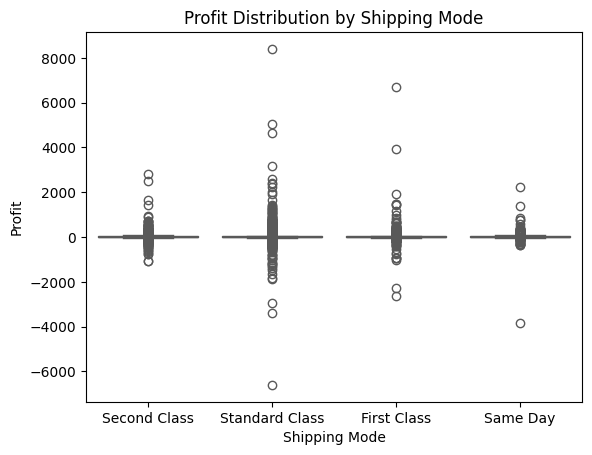

In [47]:
# Create the boxplot with a colorful palette
sns.boxplot(data=order_df, x='Ship Mode', y='Profit', palette="Set2")

# Add labels and title
plt.title("Profit Distribution by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Profit")

# Show the plot
plt.show()

In [48]:
# Find median of each shipping mode
order_df.groupby("Ship Mode")["Profit"].median()

Ship Mode
First Class       8.79255
Same Day          8.43490
Second Class      9.76080
Standard Class    8.31040
Name: Profit, dtype: float64

15.2 Which shipping mode has the highest median profit?

Ans:    Second Class

[BONUS 20 pts] Determine the percentage of customers who:
- B1)returned the product once
- B2) returned the product at least once
- B3) never returned the product
- Finally, Plot a comparison of B2 and B3

*Note: please create additional cells to answer the above points*

Percentage of customers who returned the product once: 7.86%
Percentage of customers who returned the product at least once: 28.14%
Percentage of customers who never returned the product: 71.86%


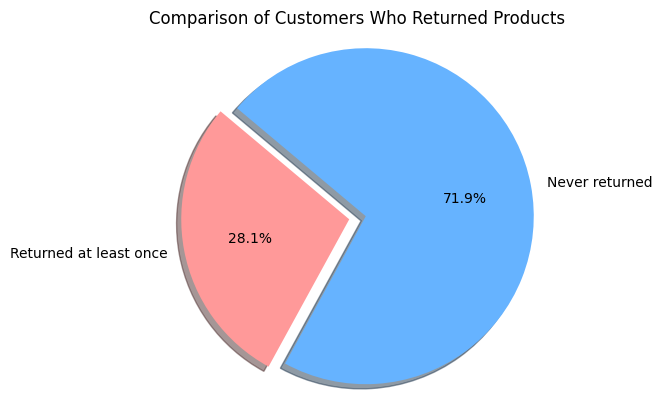

In [49]:
# Write your code here
# Determine the percentage of customers who returned the product once
returned_once = result.groupby("Customer ID")["Returned"].count().value_counts().get(1, 0)
total_customers = order_df["Customer ID"].nunique()
percentage_returned_once = (returned_once / total_customers) * 100

# Determine the percentage of customers who returned the product at least once
returned_at_least_once = result["Customer ID"].nunique()
percentage_returned_at_least_once = (returned_at_least_once / total_customers) * 100

# Determine the percentage of customers who never returned the product
never_returned = total_customers - returned_at_least_once
percentage_never_returned = (never_returned / total_customers) * 100

# Print the results
print(f"Percentage of customers who returned the product once: {percentage_returned_once:.2f}%")
print(f"Percentage of customers who returned the product at least once: {percentage_returned_at_least_once:.2f}%")
print(f"Percentage of customers who never returned the product: {percentage_never_returned:.2f}%")

# Plot a comparison of B2 and B3
labels = ['Returned at least once', 'Never returned']
sizes = [percentage_returned_at_least_once, percentage_never_returned]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Comparison of Customers Who Returned Products")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()